# Extended DMD with control for nonlinear systems
We demonstrate extended dynamic mode decomposition for control (EDMDc) applied to the classical forced Van der Pol oscillator
(this is example in Sec. 4 in Korda & Mezić, _"Linear predictors for nonlinear dynamical systems: Koopman operator meets model predictive control"_, Automatica 2018), with dynamics given by:

$$\dot{x}_{1} = 2x_2 u,\\
\dot{x}_2 = -0.8x_1 + 2x_2 -10x_1^2x_2 + u$$

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import pykoopman as pk

Generating training data, where each trajectory starts at a random initial condition in the unit box $[-1,1]^2$ and is forced by a random control signal with values drawn from a uniform distribution over the interval $[-1,1]$.

In [20]:
n_states = 2 # Number of states
n_inputs = 1 # Number of control inputs
dT = 0.01    # Timestep

from pykoopman.common.examples import vdp_osc, rk4, square_wave

# Integrate
# def integrate_vdp(x0, u, dT, n_int):
#     n_states, = x0.size
#     n_inputs, = u.size
#     X = np.zeros((n_states, n_int))
#     X[:, 0] = x0
#     x = x0.reshape(n_states,1)
#     U = np.zeros(n_inputs, n_int)
#     for step in range(n_int-1):
#         y = rk4(0, x, u[np.newaxis, step], dT, vdp_osc)
#         X[:, step+1] = y.reshape(n_states,)
#         U[:, step] = u[step]
#         x = y
#     return X, U

A training dataset is created consisting of 200 trajectories, each trajectory is integrated for 1000 timesteps and forced by a random actuation in the range $[-1,1]$.

In [28]:
n_traj = 200  # Number of trajectories
n_int = 1000  # Integration length
t = np.arange(0, n_int*dT, dT)

# Uniform forcing in [-1, 1]
u = 2*rnd.rand(n_int, n_traj)-1

# Uniform distribution of initial conditions
x = 2*rnd.rand(n_states, n_traj)-1

# Init
X = np.zeros((n_states, n_int*n_traj))
Y = np.zeros((n_states, n_int*n_traj))
U = np.zeros((n_inputs, n_int*n_traj))

# Integrate
for step in range(n_int):
    y = rk4(0, x, u[step, :], dT, vdp_osc)
    X[:, (step)*n_traj:(step+1)*n_traj] = x
    Y[:, (step)*n_traj:(step+1)*n_traj] = y
    U[:, (step)*n_traj:(step+1)*n_traj] = u[step, :]
    x = y

t = np.arange(0, n_int*dT, dT)

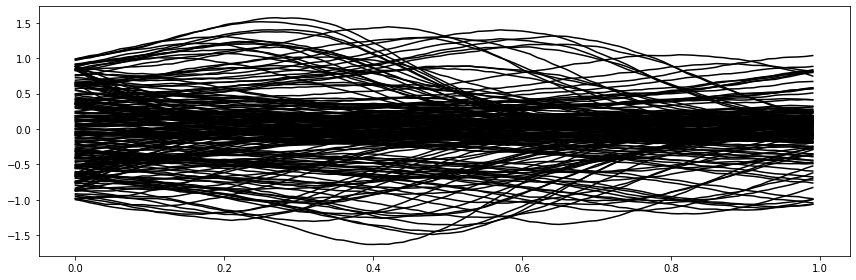

In [30]:
fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(12, 4))
for traj_idx in range(n_traj):
    x = X[:, traj_idx::n_traj]
    axs.plot(t[0:100], x[1, 0:100], 'k')

In [31]:
model = pk.Koopman(regressor=EDMDc)
model.fit(x=X, y=Y, u=U)

NameError: name 'EDMDc' is not defined

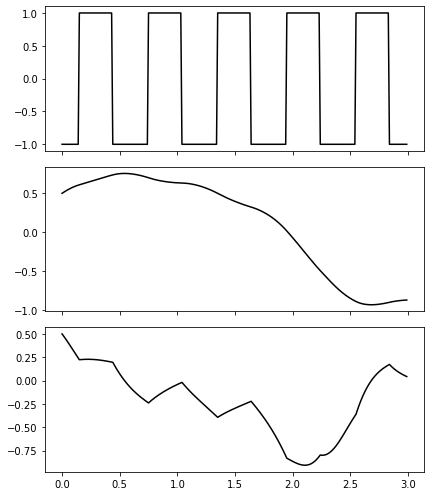

In [24]:
# n_int = 300  # Integration length
# t = np.arange(0, n_int*dT, dT)
# u = np.array([-square_wave(step+1) for step in range(n_int)])
# # u = np.zeros((1, n_int)) #2*rnd.rand(1, n_int)-1
# x = np.array([0.5, 0.5])
# # x = np.array([[-0.1], [-0.5]])
#
# # Integrate
# X = np.zeros((n_states, n_int))
# X[:, 0] = x
# for step in range(1, n_int, 1):
#     y = rk4(0, X[:, step-1].reshape(n_states,1), u[np.newaxis, step-1], dT, vdp_osc)
#     X[:, step] = y.reshape(n_states,)
#
# fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize=(6, 7))
# #sharey=True, gridspec_kw={'width_ratios': [2, 1]}
# axs[0].plot(t, u, '-k')
# # axs[0, 1].hist(u, bins=20, orientation="horizontal")
# axs[1].plot(t, X[0, :], '-k')
# axs[2].plot(t, X[1, :], '-k')

Integrate system

In [ ]:
DMDc = pk.DMDc(svd_rank=3)

model = pk.Koopman(regressor=DMDc)
model.fit(x,C)
Aest = model.state_transition_matrix
Best = model.control_matrix

np.allclose(A,Aest)
np.allclose(B,Best)